In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv(r"C:\Users\Hamsha Vardhan\Downloads\AMLT\spam (1).csv", encoding="latin-1")
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.shape

(5572, 2)

In [8]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)
bow = CountVectorizer(stop_words='english')
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [9]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [10]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

y_pred_mnb = mnb.predict(X_test_tfidf)


In [11]:
gnb = GaussianNB()
gnb.fit(X_train_tfidf.toarray(), y_train)

y_pred_gnb = gnb.predict(X_test_tfidf.toarray())

In [12]:
def evaluate_model(y_true, y_pred):
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))


In [13]:
print("Multinomial Naive Bayes Performance")
evaluate_model(y_test, y_pred_mnb)


Multinomial Naive Bayes Performance
Accuracy : 0.9668161434977578
Precision: 1.0
Recall   : 0.7533333333333333
F1 Score : 0.8593155893536122


In [14]:
print("Gaussian Naive Bayes Performance")
evaluate_model(y_test, y_pred_gnb)


Gaussian Naive Bayes Performance
Accuracy : 0.884304932735426
Precision: 0.5425101214574899
Recall   : 0.8933333333333333
F1 Score : 0.6750629722921915


[[965   0]
 [ 37 113]]


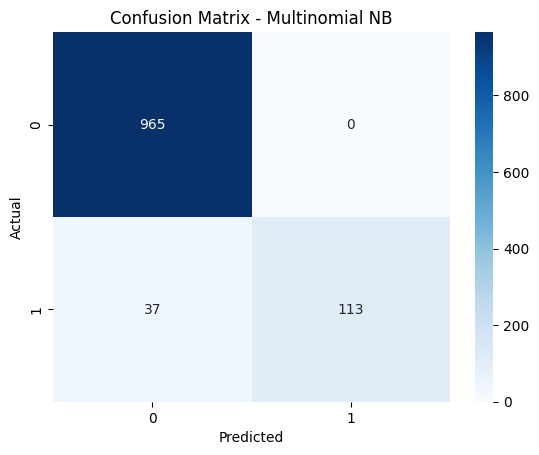

In [16]:
cm = confusion_matrix(y_test, y_pred_mnb)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multinomial NB")
plt.show()


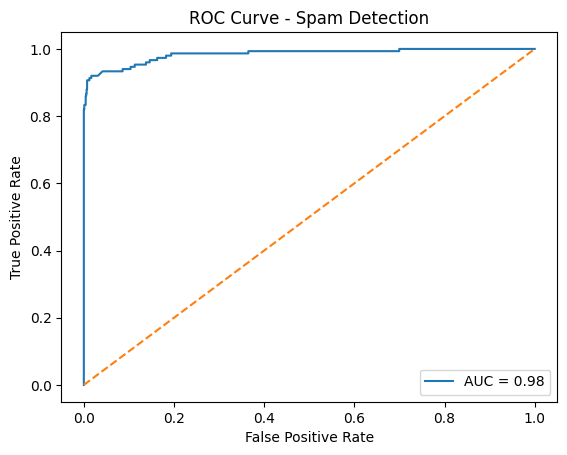

In [17]:
y_prob = mnb.predict_proba(X_test_tfidf)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Spam Detection")
plt.legend()
plt.show()


In [18]:
new_emails = [
    "Congratulations! You won a free lottery",
    "Let's meet tomorrow for project discussion"
]

new_features = tfidf.transform(new_emails)
predictions = mnb.predict(new_features)

for email, pred in zip(new_emails, predictions):
    print(email, "->", "Spam" if pred == 1 else "Not Spam")


Congratulations! You won a free lottery -> Spam
Let's meet tomorrow for project discussion -> Not Spam
